In [2]:
from numpy import pi, exp, sqrt
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import sys

In [3]:
plt.rcParams["figure.figsize"] = (20,20)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
def bil(img, d, sigma_s, sigma_r):
    k = int(d/2)
    size=img.shape
    image_padded = np.zeros((size[0] + d, size[1] + d))   
    image_padded[k:-1*k-1, k:-1*k-1] = img
    
    final = img.copy()
    x,y= np.meshgrid(np.linspace(-k,k,1),np.linspace(-k,k,1))
    LUT = np.exp(-(x**2 + y**2)/(2*(sigma_s**2)))
    
    for i in range(size[0]):
        for j in range(size[1]):
            
            value=img[i][j]
            diff=(np.ones((d,d))*value-image_padded[i:i+d,j:j+d])
            diff1=np.power(diff,2)
            w1=exp(-(diff1/(2*(sigma_r**2))))
            w = w1*LUT
            
            final[i,j] = (np.sum(w*image_padded[i:i+d,j:j+d]))/np.sum(w)
            
    final.clip(0,255)
    return final

In [5]:
def bilateral(img,kk,ss,sr):
    img1=img.copy()
    img1[:,:,0]=bil(img[:,:,0],kk,ss,sr)
    img1[:,:,1]=bil(img[:,:,1],kk,ss,sr)
    img1[:,:,2]=bil(img[:,:,2],kk,ss,sr)
    
    return img1

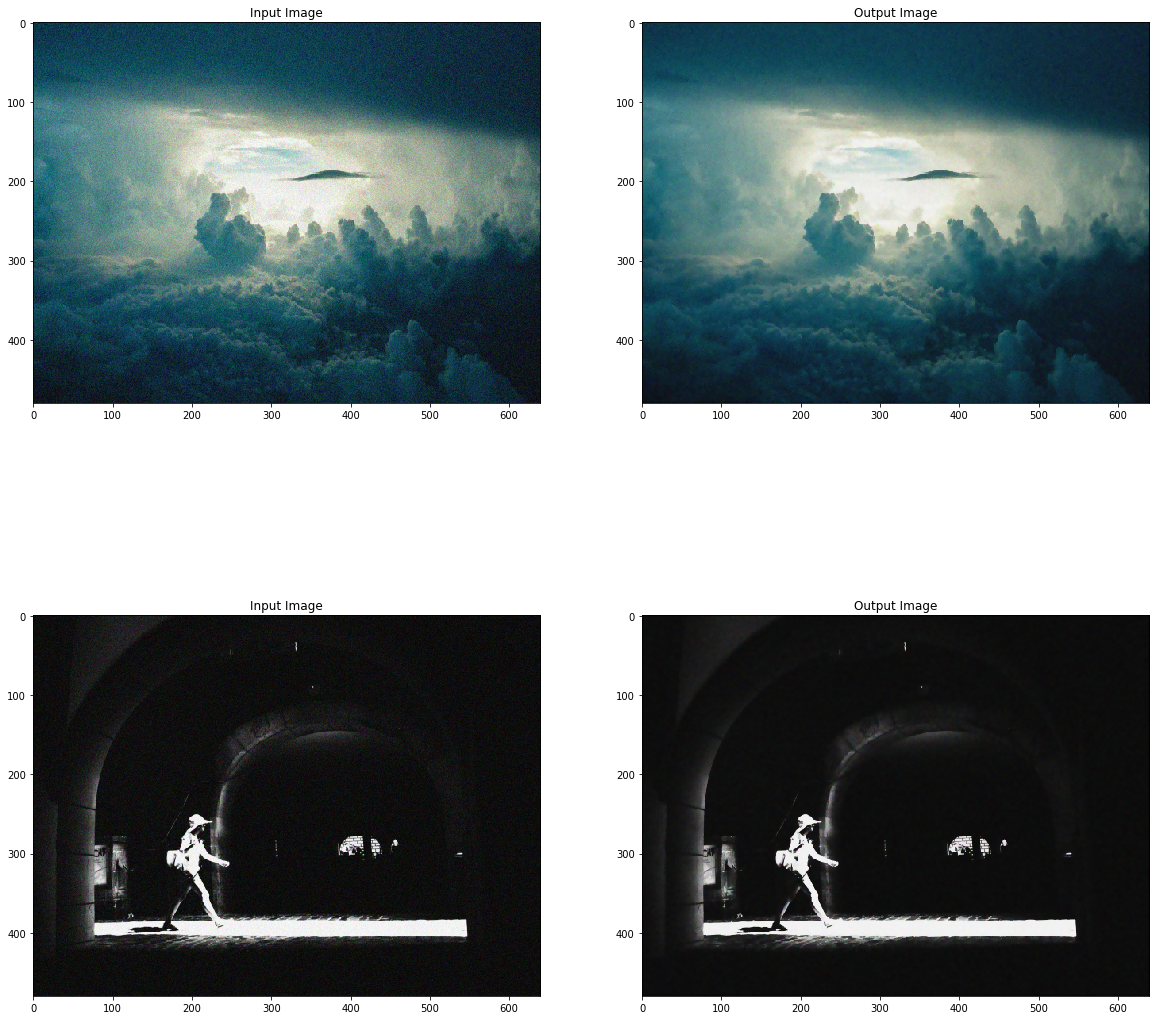

In [6]:
sky = cv2.imread('sky.png')
sky = cv2.cvtColor(sky,cv2.COLOR_BGR2RGB)

noir = cv2.imread('noir.png')
noir = cv2.cvtColor(noir,cv2.COLOR_BGR2RGB)

op1=bilateral(sky,5,12,16)
op2=bilateral(noir,5, 12, 16)
plt.subplot(2,2,1)
plt.imshow(sky)
plt.title("Input Image")
plt.subplot(2,2,2)
plt.imshow(op1)
plt.title("Output Image")
plt.subplot(2,2,3)
plt.imshow(noir)
plt.title("Input Image")
plt.subplot(2,2,4)
plt.imshow(op2)
plt.title("Output Image")
plt.show()

Minimized L2 norm :  7665.102347653292
Sigma values choosen are 80 and 10


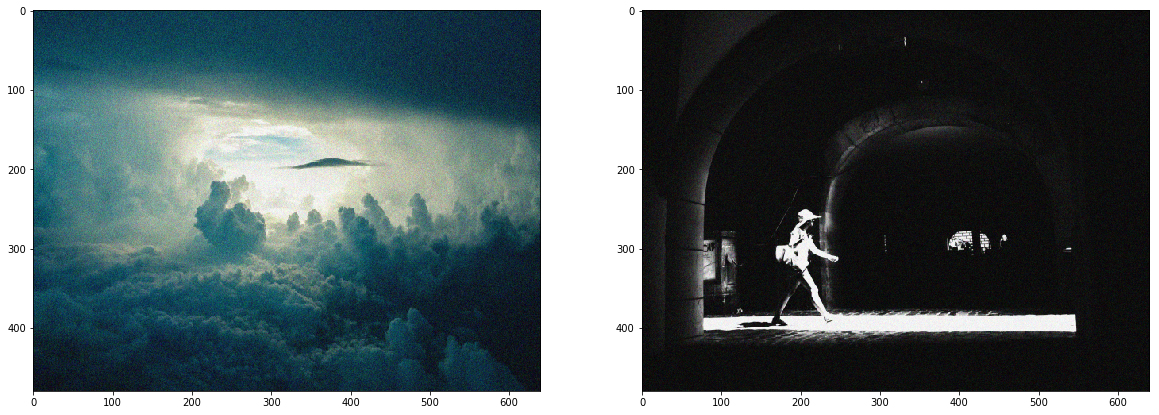

In [9]:
gt_sky = cv2.imread('gt_sky.png')
gt_sky = cv2.cvtColor(gt_sky,cv2.COLOR_BGR2RGB)

sky_out = bilateral(sky,5,80,10)
noir_out = bilateral(noir,5,80,10)

gt_noir = cv2.imread('gt_noir.png')
gt_noir = cv2.cvtColor(gt_noir,cv2.COLOR_BGR2RGB)


print("Minimized L2 norm : ",np.linalg.norm(gt_sky.astype(np.float64)-sky_out.astype(np.float64)))
print("Sigma values choosen are 80 and 10")

plt.subplot(1,2,1)
plt.imshow(sky)
plt.subplot(1,2,2)
plt.imshow(noir)
plt.show()